<a href="https://colab.research.google.com/github/lacykaltgr/ait-assessments/blob/main/05_AIT_Deep_learning_Exercise_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Exercises: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

In [3]:
nb_samples

20640

In [8]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

Splitting data into training, validation and test sets:

In [6]:
valid_split = 0.2
test_split  = 0.1

v_point = int(nb_samples*(1-test_split-valid_split))
t_point = int(nb_samples*(1-test_split))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [ ]:
mean    = np.mean(X_train)
std     = np.std(X_train)
X_train = (X_train-mean)/std
X_valid = (X_valid-mean)/std
X_test  = (X_test-mean)/std

In [79]:
X_train.shape

(14447, 8)

Model definition, hints:
* one or two hidden layers and 8-64 neurons / layer
* the hidden layers should have non-linear activation functions
* the input and output layers' sizes are defined by the data
* as the output is continuous, it can be a linear layer

In [163]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation=None))

Inspect the model summary:

In [129]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                288       
                                                                 
 dense_59 (Dense)            (None, 8)                 264       
                                                                 
 dense_60 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model, hints:
* the loss function has to match the task (regession)
* you should try ADAM and/or SGD optimizer

In [164]:
model.compile(loss='mean_squared_error', optimizer='adam')

Defining the earlystopping callback function:

In [149]:
es = EarlyStopping(monitor='loss', patience=20)

Train the model, use training and validation data and apply early stopping:

In [165]:
model.fit(X_train, Y_train, 
          validation_data=(X_valid,Y_valid),
          batch_size=512,                             
          epochs=300, 
          verbose=1, 
          callbacks=[es])

Epoch 1/300
29/29 [==============================] - 1s 7ms/step - loss: 2.6582 - val_loss: 2.5804
Epoch 2/300
29/29 [==============================] - 0s 3ms/step - loss: 1.4388 - val_loss: 1.9072
Epoch 3/300
29/29 [==============================] - 0s 3ms/step - loss: 1.3599 - val_loss: 1.9298
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 1.3228 - val_loss: 1.8973
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 1.3006 - val_loss: 1.8741
Epoch 6/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2890 - val_loss: 1.8553
Epoch 7/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2823 - val_loss: 1.8574
Epoch 8/300
29/29 [==============================] - 0s 3ms/step - loss: 1.2774 - val_loss: 1.8430
Epoch 9/300
29/29 [==============================] - 0s 4ms/step - loss: 1.2731 - val_loss: 1.8231
Epoch 10/300
29/29 [==============================] - 0s 4ms/step - loss: 1.2698 - val_loss: 1.8408
Epoch 11/

Evaluate the model on the test data:

In [140]:
model.evaluate(X_valid, Y_valid)

130/130 [==============================] - 0s 2ms/step - loss: 0.7031


0.7031354904174805

Run inference on the test data:

In [166]:
preds = model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


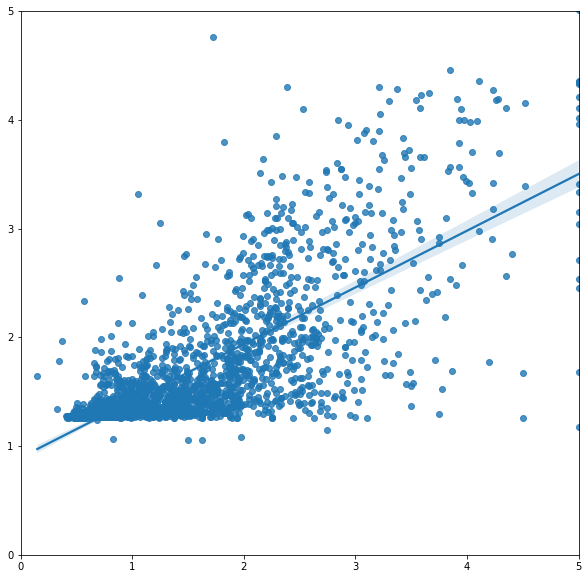

In [167]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 